In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("/content/electricity_prices.csv", na_values=['?'])
df.head()

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01/11/2011 00:00,None,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.0,9.3,600.71,356.0,3159.60,54.32
1,01/11/2011 00:30,None,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.0,11.1,605.42,317.0,2973.01,54.23
2,01/11/2011 01:00,None,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.0,11.1,589.97,311.0,2834.00,54.23
3,01/11/2011 01:30,None,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.0,9.3,585.94,313.0,2725.99,53.47
4,01/11/2011 02:00,None,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.0,11.1,571.52,346.0,2655.64,39.87


In [ ]:
df.shape

(38014, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DateTime                38014 non-null  object 
 1   Holiday                 38014 non-null  object 
 2   HolidayFlag             38014 non-null  int64  
 3   DayOfWeek               38014 non-null  int64  
 4   WeekOfYear              38014 non-null  int64  
 5   Day                     38014 non-null  int64  
 6   Month                   38014 non-null  int64  
 7   Year                    38014 non-null  int64  
 8   PeriodOfDay             38014 non-null  int64  
 9   ForecastWindProduction  38009 non-null  float64
 10  SystemLoadEA            38012 non-null  float64
 11  SMPEA                   38012 non-null  float64
 12  ORKTemperature          37719 non-null  float64
 13  ORKWindspeed            37715 non-null  float64
 14  CO2Intensity            38007 non-null

In [ ]:
df.isnull().sum()

DateTime                    0
Holiday                     0
HolidayFlag                 0
DayOfWeek                   0
WeekOfYear                  0
Day                         0
Month                       0
Year                        0
PeriodOfDay                 0
ForecastWindProduction      5
SystemLoadEA                2
SMPEA                       2
ORKTemperature            295
ORKWindspeed              299
CO2Intensity                7
ActualWindProduction        5
SystemLoadEP2               2
SMPEP2                      2
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

DateTime                  0
Holiday                   0
HolidayFlag               0
DayOfWeek                 0
WeekOfYear                0
Day                       0
Month                     0
Year                      0
PeriodOfDay               0
ForecastWindProduction    0
SystemLoadEA              0
SMPEA                     0
ORKTemperature            0
ORKWindspeed              0
CO2Intensity              0
ActualWindProduction      0
SystemLoadEP2             0
SMPEP2                    0
dtype: int64

In [ ]:
df = df.drop(['DateTime'], axis = 1)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

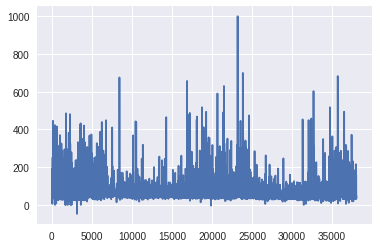

In [ ]:
plt.plot("SMPEP2", data=df)

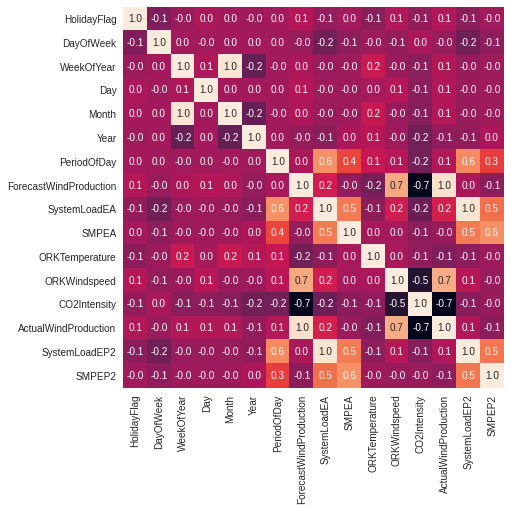

In [ ]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(), annot=True, square=True, fmt='.1f', cbar=False);

In [ ]:
!pip install AutoViz
!pip install xlrd

In [ ]:
#importing Autoviz class
from autoviz.AutoViz_Class import AutoViz_Class

#Instantiate the AutoViz class
AV = AutoViz_Class()

Shape of your Data Set: (38014, 18)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  5
    Number of String-Categorical Columns =  3
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  7
    Number of NLP String Columns =  0
    Number of Date Time Columns =  1
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    18 Predictors classified...
        This does not include the Target column(s)
        8 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 15


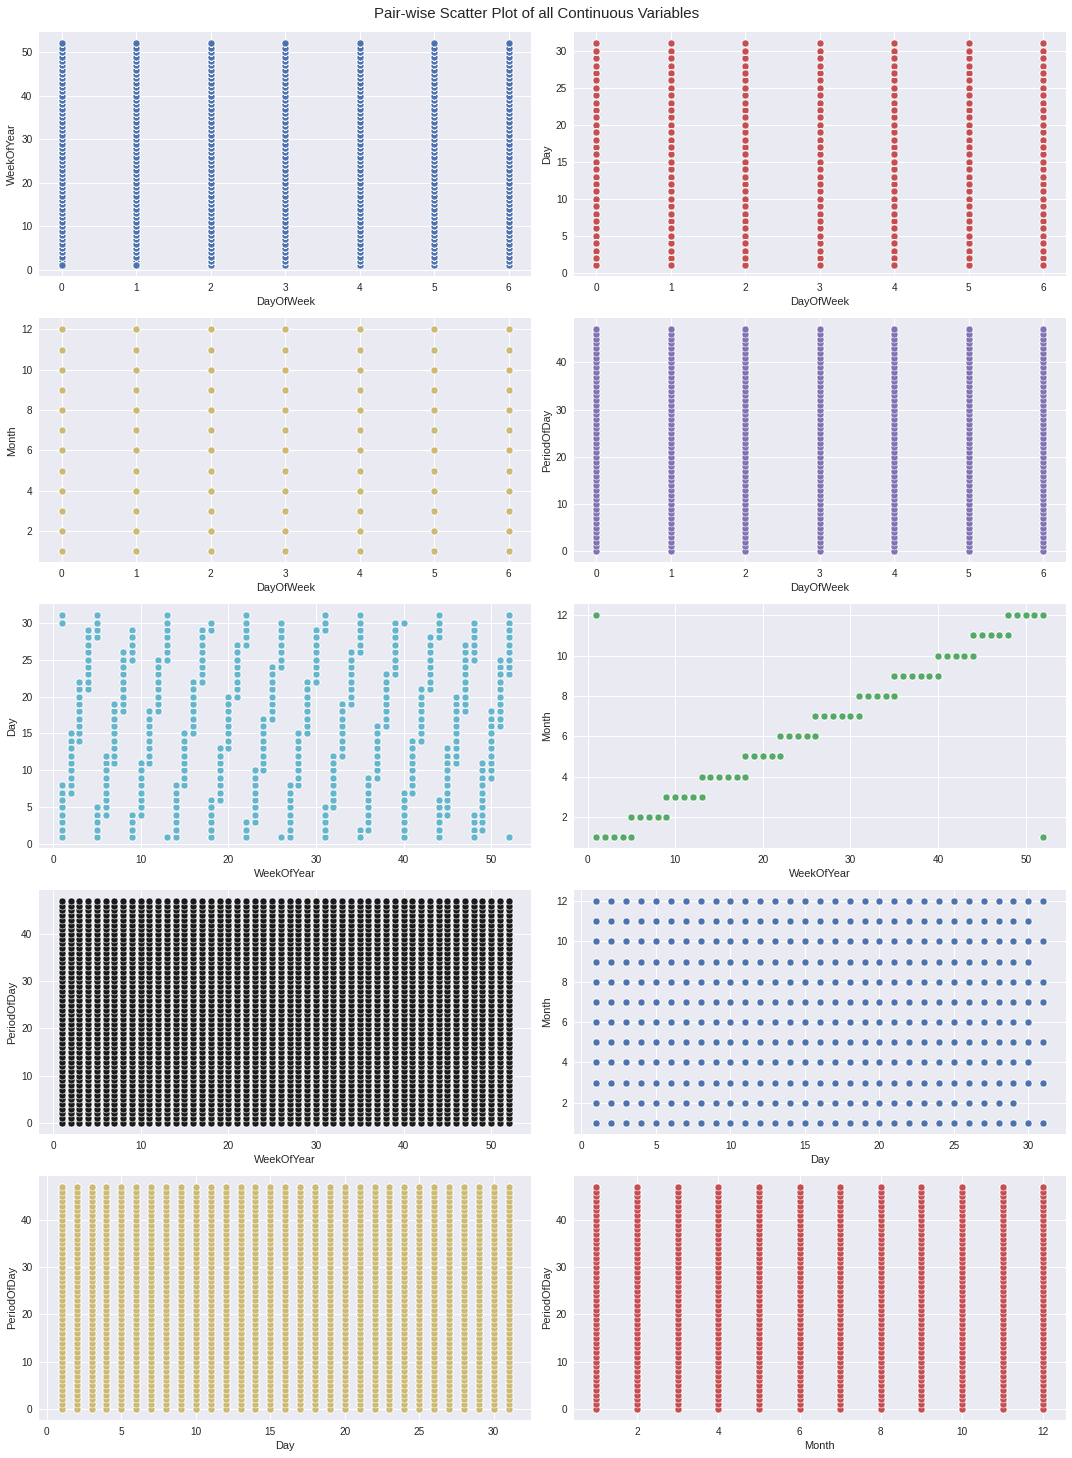

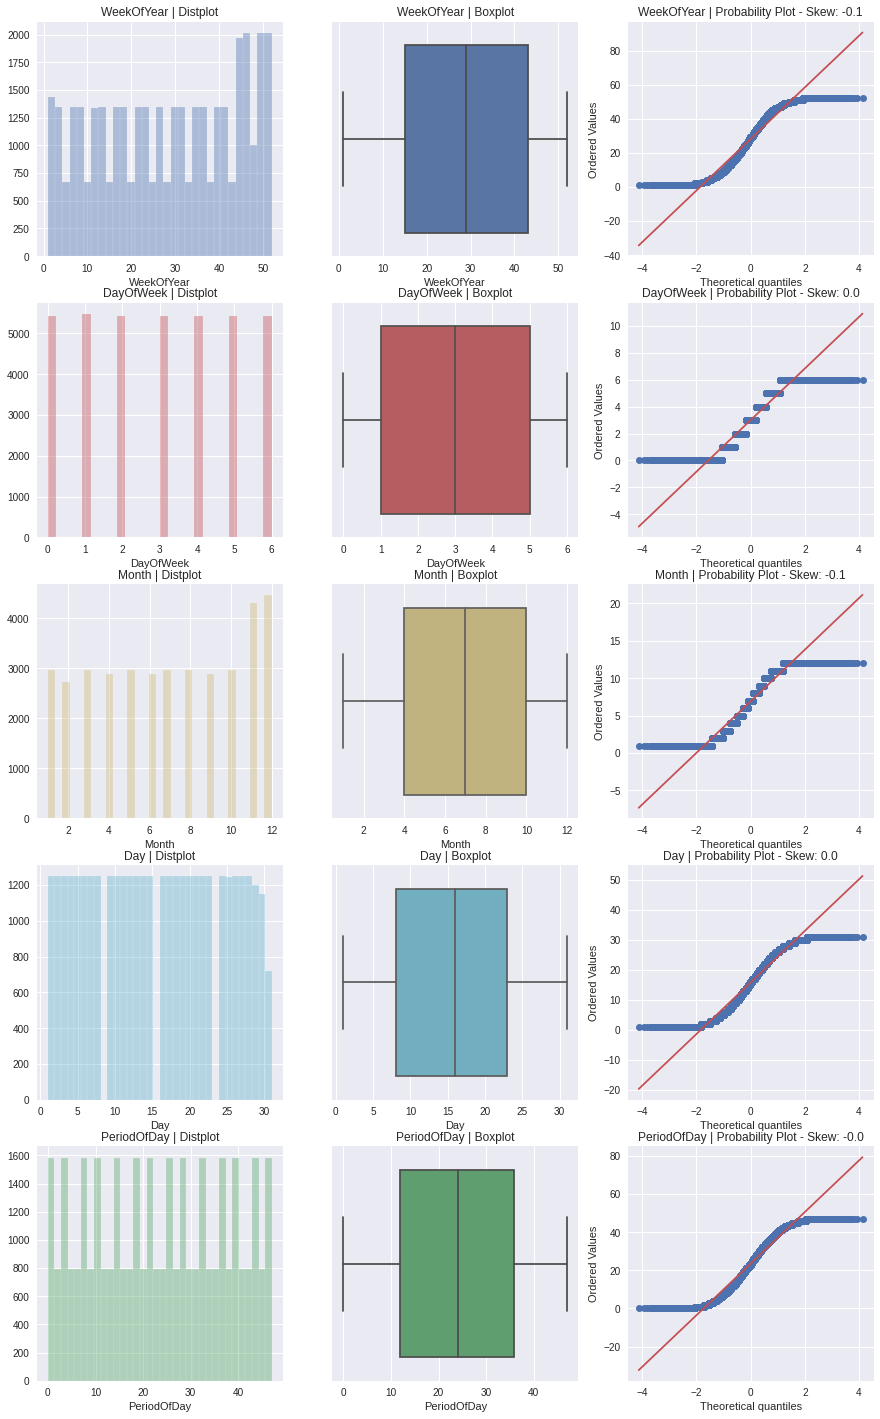

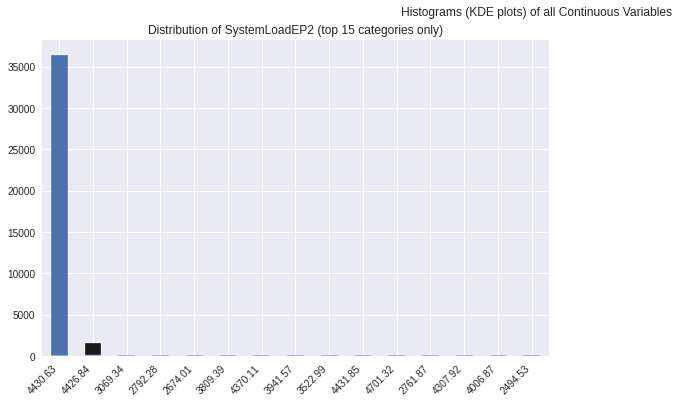

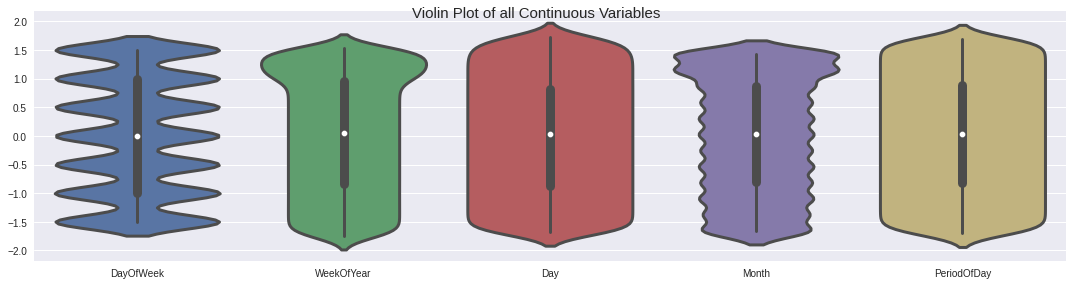

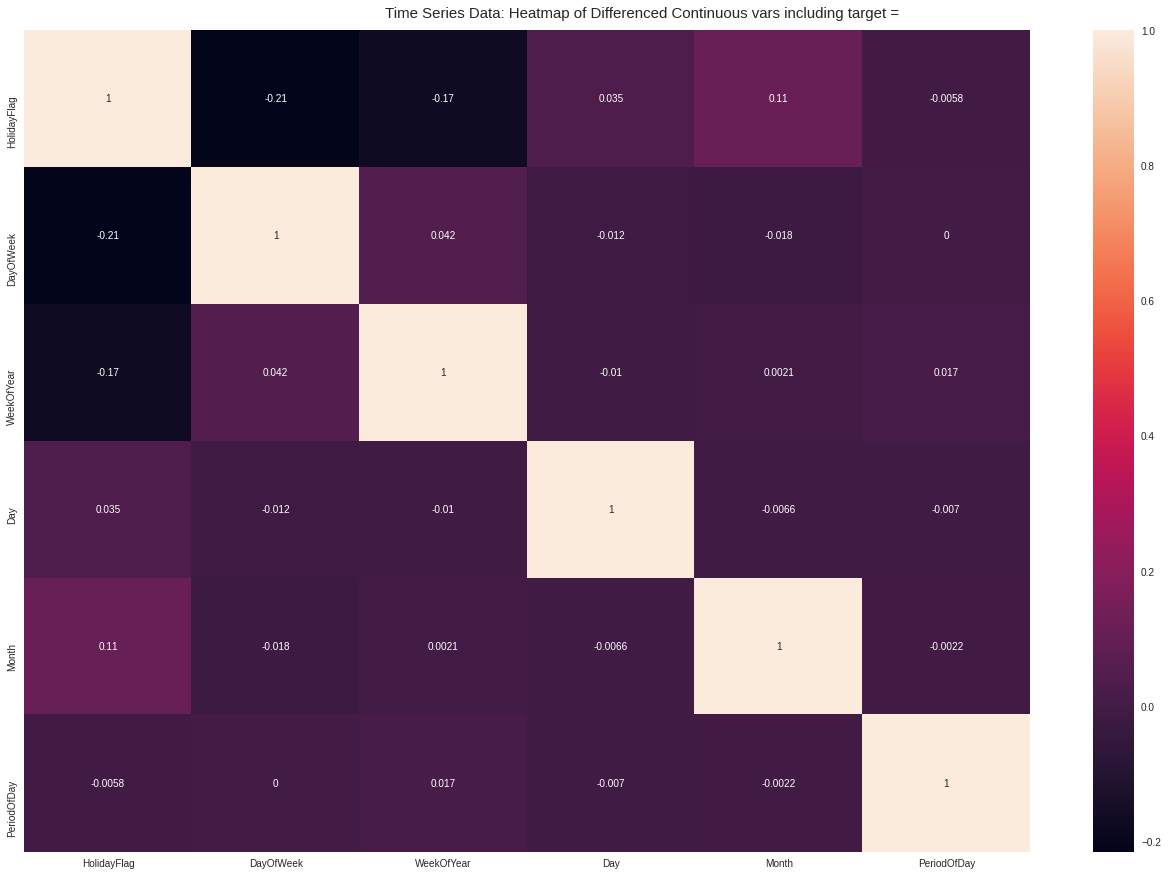

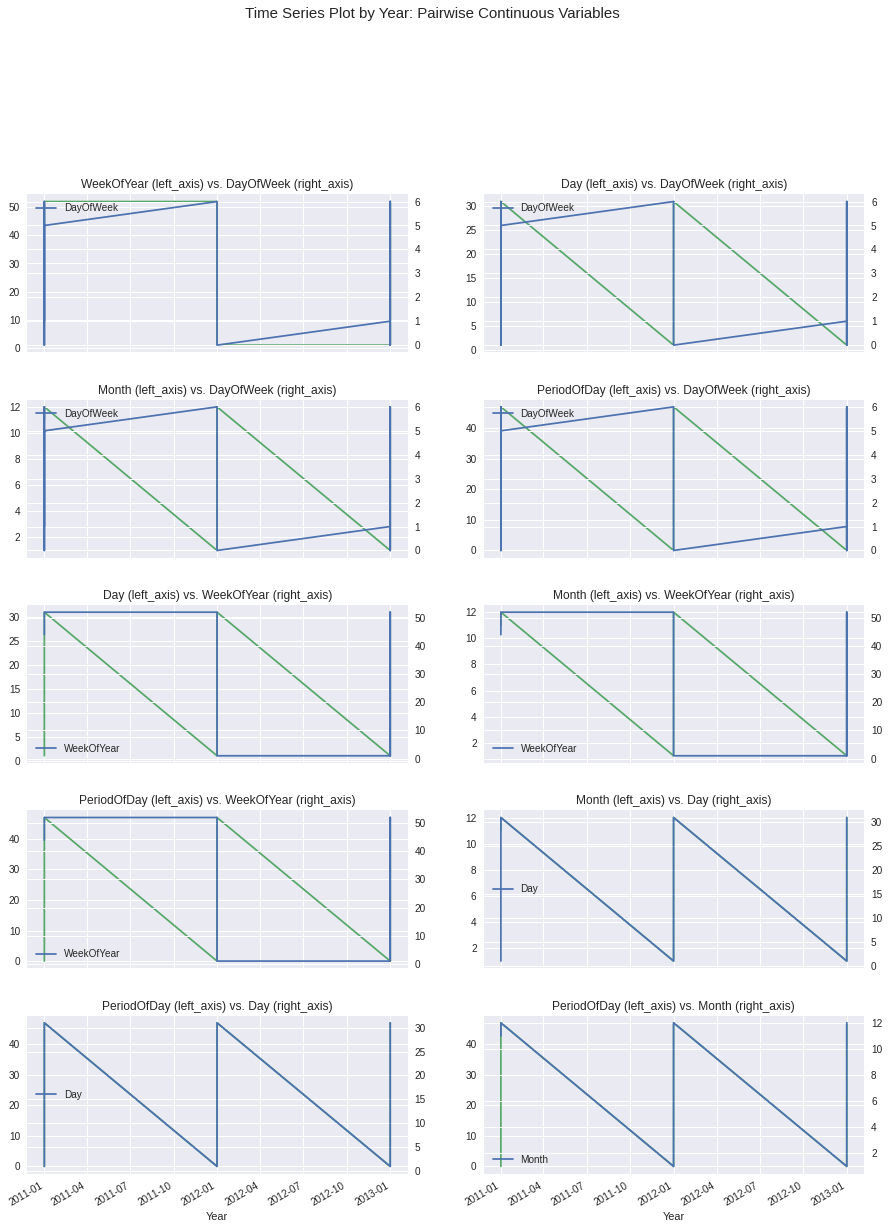

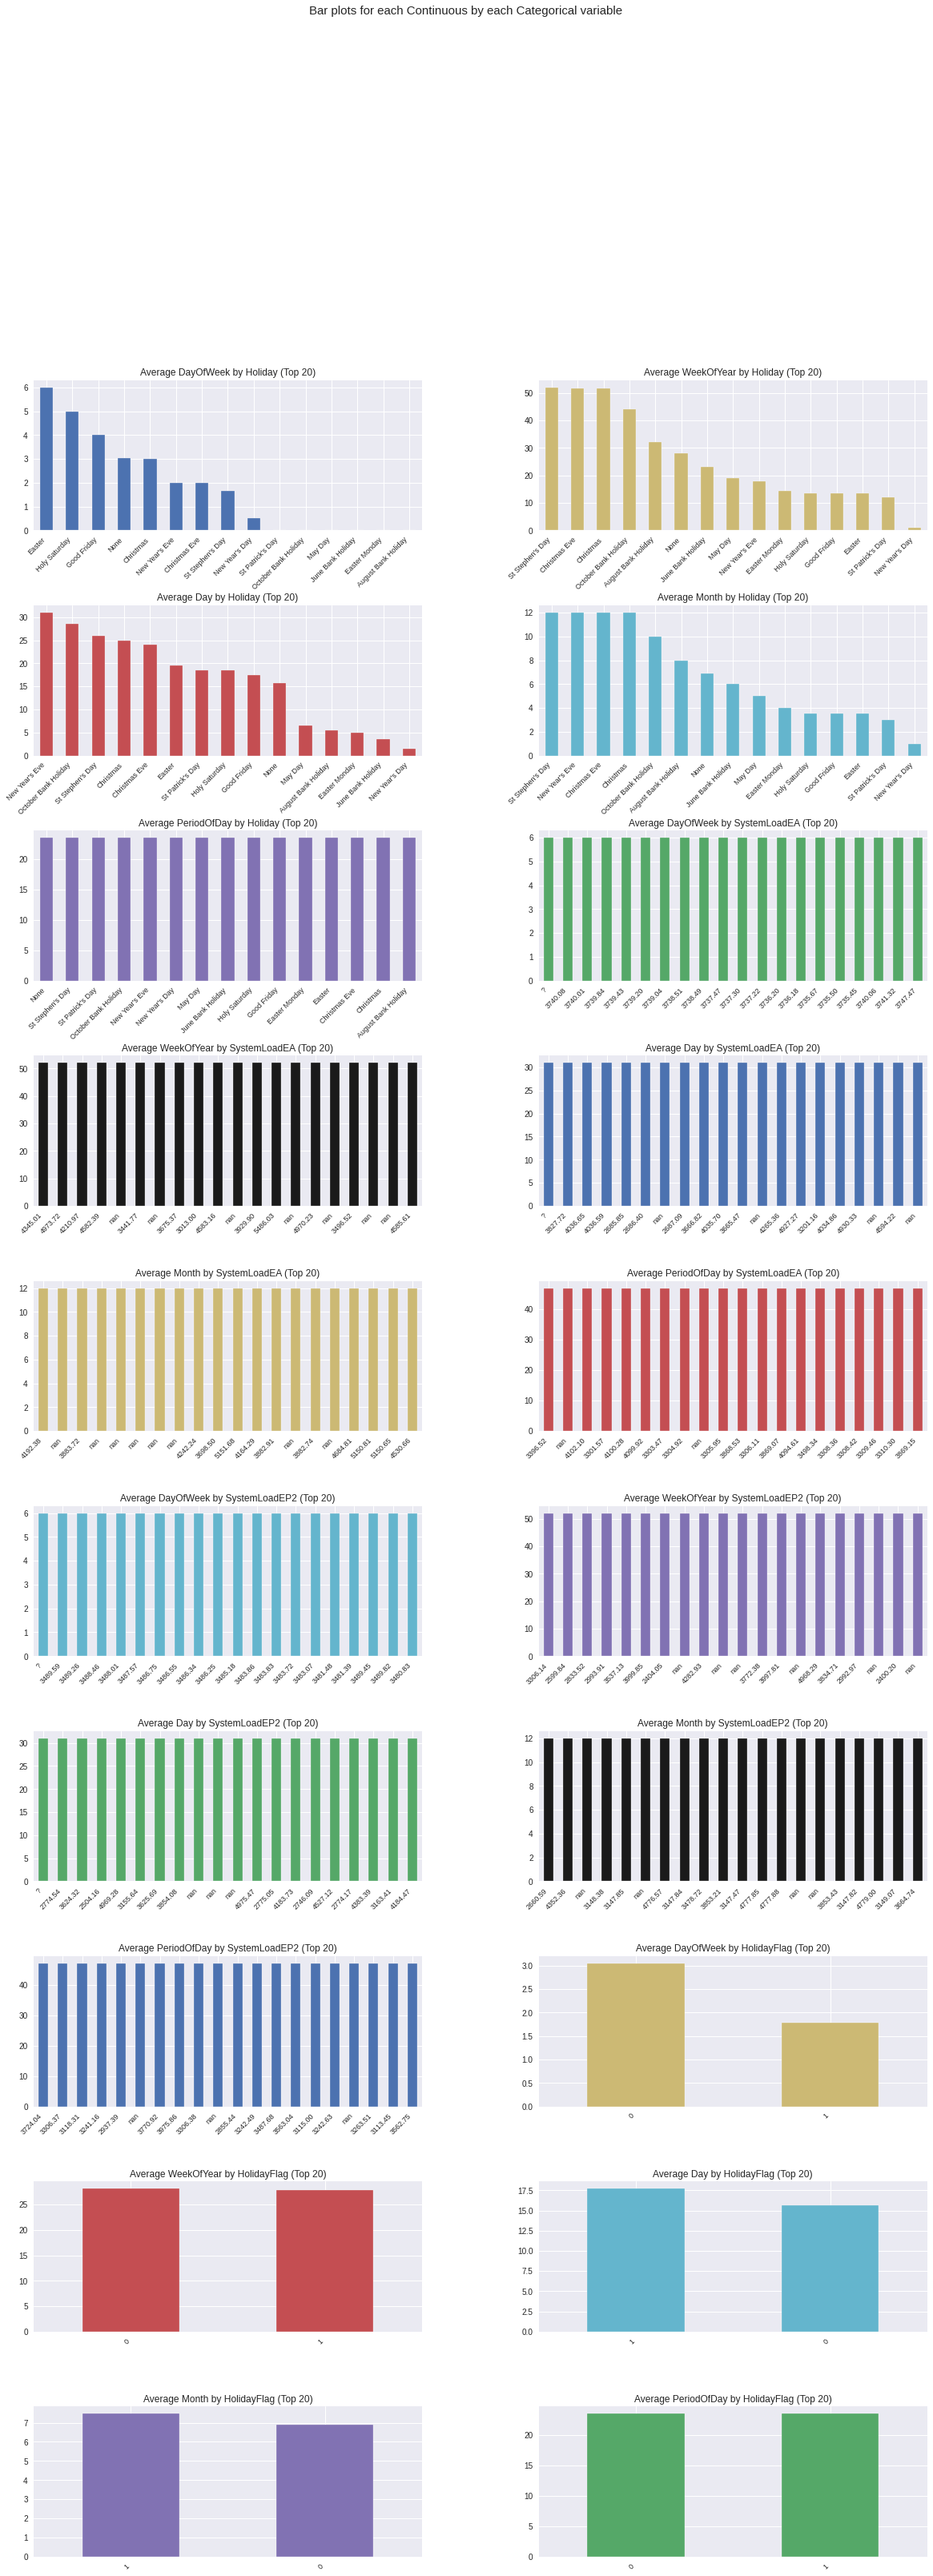

Time to run AutoViz (in seconds) = 31.843

 ###################### VISUALIZATION Completed ########################


In [ ]:
df_viz = AV.AutoViz('/content/electricity_prices.csv')

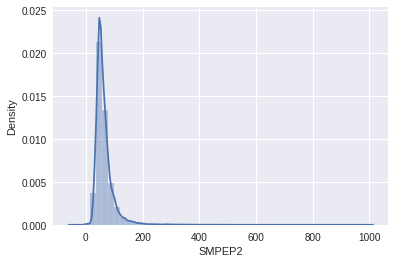

In [ ]:
sns.distplot(df['SMPEP2'])

In [ ]:
X = df[['ActualWindProduction', 'SystemLoadEP2', 'SMPEA', 'SystemLoadEA', 'ForecastWindProduction', 
     'DayOfWeek', 'Year', 'ORKWindspeed', 'CO2Intensity', 'PeriodOfDay']]
y = df['SMPEP2']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
model = keras.Sequential([
        keras.layers.Dense(512, activation="relu", input_shape=[10]),
        keras.layers.Dense(800, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1024, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1, activation = 'linear'),
        ])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               5632      
_________________________________________________________________
dense_5 (Dense)              (None, 800)               410400    
_________________________________________________________________
dropout_2 (Dropout)          (None, 800)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              820224    
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 1025      
Total params: 1,237,281
Trainable params: 1,237,281
Non-trainable params: 0
____________________________________________

In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(patience = 10, min_delta = 0.001, 
                                               restore_best_weights =True )
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=50,
    epochs=100,
    callbacks=[early_stopping],
    verbose=1, 
)

Epoch 1/100
679/679 [==============================] - 16s 22ms/step - loss: 1032.1927 - mse: 1032.1927 - mae: 20.0588 - val_loss: 675.2353 - val_mse: 675.2353 - val_mae: 16.3967
Epoch 2/100
679/679 [==============================] - 15s 22ms/step - loss: 660.9621 - mse: 660.9621 - mae: 14.8428 - val_loss: 625.4997 - val_mse: 625.4997 - val_mae: 14.5102
Epoch 3/100
679/679 [==============================] - 15s 22ms/step - loss: 674.6938 - mse: 674.6938 - mae: 14.5227 - val_loss: 612.9384 - val_mse: 612.9384 - val_mae: 14.0946
Epoch 4/100
679/679 [==============================] - 15s 22ms/step - loss: 842.9383 - mse: 842.9383 - mae: 14.9256 - val_loss: 600.4036 - val_mse: 600.4036 - val_mae: 13.0044
Epoch 5/100
679/679 [==============================] - 15s 22ms/step - loss: 651.7215 - mse: 651.7215 - mae: 14.2027 - val_loss: 646.5245 - val_mse: 646.5245 - val_mae: 15.2125
Epoch 6/100
679/679 [==============================] - 15s 22ms/step - loss: 690.0765 - mse: 690.0765 - mae: 14.5

In [ ]:
from sklearn.metrics import mean_absolute_error,r2_score
predictions = model.predict(X_test)
print(f"MAE: {mean_absolute_error(y_test, predictions)}")

print(f"R2_score: {r2_score(y_test, predictions)}")

MAE: 10.99616479512835
R2_score: 0.5678318389935775


In [ ]:
import xgboost

In [ ]:
from xgboost import XGBRegressor
model2 = XGBRegressor(n_estimators = 8000, max_depth=17, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model2.fit(X_train, y_train)
pred = model2.predict(X_test)
r2_score(y_test, pred)

[18:11:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.6137340486115418

In [ ]:
mean_absolute_error(y_test, pred)

9.415647364373736

In [ ]:
pred

array([ 45.052734,  58.09632 ,  66.80695 , ...,  63.155807,  40.944473,
       182.29193 ], dtype=float32)